In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L = 100.#Tamaño de la caja
ran_x = L*np.random.uniform(0.,1.,5000)#5000 números aleatorios en x
ran_y = L*np.random.uniform(0.,1.,5000)#5000 números aleatorios en y

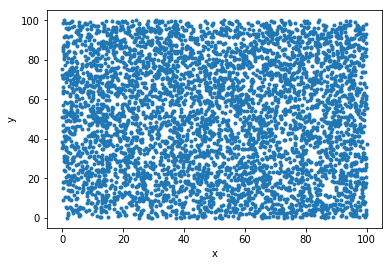

In [3]:
#Grafica de los puntos aleatorios
plt.plot(ran_x,ran_y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

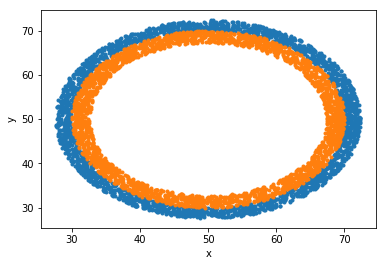

In [4]:
#Generación de los datos y su gráfica
theta1 = np.random.random(2500)*2.*np.pi
r1 = np.random.uniform(400.,500.,2500)#Radio entre 20 y 22.3
r2 = np.random.uniform(300.,400.,2500)#Radio entre 17.32 y 20
r_1 = np.sqrt(r1)
r_2 = np.sqrt(r2)
x1 = r_1*np.cos(theta1) + 50.
y1 = r_1*np.sin(theta1) + 50.
x2 = r_2*np.cos(theta1) + 50.
y2 = r_2*np.sin(theta1) + 50.
plt.plot(x1,y1,'.')
plt.plot(x2,y2,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

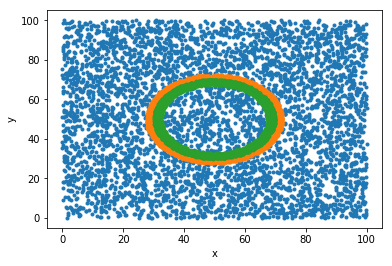

In [5]:
#Gráfica de datos y aleatorios
plt.plot(ran_x,ran_y,'.')
plt.plot(x1,y1,'.')
plt.plot(x2,y2,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
#Función para calcular las distancias
def distancia(x1,x2,y1,y2):
    d = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    return d

In [7]:
Lmax = np.sqrt(2.)*L#distancia máxima en la caja 2D (la diagonal)
tbin = Lmax/20#tamaño de los bins, número de bins = 20
nbin = np.linspace(0.,np.sqrt(2.)*L,20)#Genera los bins
print nbin

[  0.           7.44322928  14.88645855  22.32968783  29.7729171
  37.21614638  44.65937565  52.10260493  59.54583421  66.98906348
  74.43229276  81.87552203  89.31875131  96.76198058 104.20520986
 111.64843913 119.09166841 126.53489769 133.97812696 141.42135624]


In [8]:
cont1 = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos del radio exterior,formado por enteros
cont2 = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos del radio interior,formado por enteros
cont_ran = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los aleatorios,formado por enteros
w1 = 1#Peso 1, en este caso asignado a los puntos del radio exterior x1,y1
w2 = 2#Peso 2, en este caso asignado a los puntos del radio interior x2,y2

In [9]:
#Junta las coordenadas en x y y de los anillos en un solo arreglo
data_x = np.concatenate((x1,x2))
data_y = np.concatenate((y1,y2))

In [10]:
#Ciclos para calcular y contar las distancias entre los puntos del radio exterior con su respectivo peso
for i in range(len(x1)):
    for j in range(i+1,len(x1)):
        d_d1 = distancia(x1[i],x1[j],y1[i],y1[j])
        temp1 = int(d_d1/tbin)
        cont1[temp1] += w1*1

In [11]:
#Ciclos para calcular y contar las distancias entre los puntos del radio interior con su respectivo peso
for i in range(len(x2)):
    for j in range(i+1,len(x2)):
        d_d2 = distancia(x2[i],x2[j],y2[i],y2[j])
        temp2 = int(d_d2/tbin)
        cont2[temp2] += w2*1

In [12]:
#Calcula y cuenta las distancias entre los aleatorios
for i in range(len(ran_x)):
    for j in range(i+1,len(ran_x)):
        d_r = distancia(ran_x[i],ran_x[j],ran_y[i],ran_y[j])
        temp_ran = int(d_r/tbin)
        cont_ran[temp_ran] +=1

In [13]:
#Suma las frecuencias de las distancias
cont_data = cont1+cont2

Histograma de datos

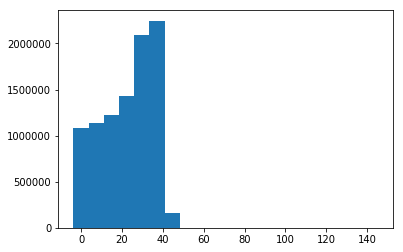

In [14]:
plt.bar(nbin,cont_data, width=7.5)
plt.show()

Histograma de aleatorios

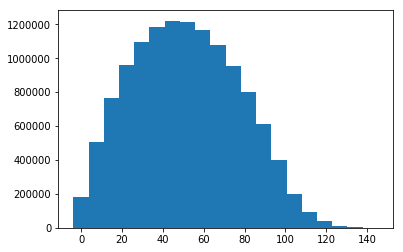

In [15]:
plt.bar(nbin,cont_ran, width=7.5)
plt.show()

Función de Correlación de Peebles $\frac{DD(r)}{RR(r)} -1$

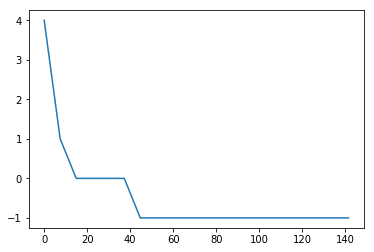

In [16]:
plt.plot(nbin,cont_data/cont_ran -1)
plt.show()

Para la función de correlación de Landy-Szalay $1 + \frac{DD(r)}{RR(r)} -2\frac{DR(r)}{RR(r)} $

In [17]:
#arreglo de ceros del número de bins donde contaremos las distancias entre los datos y los aleatorios
cont_dr = np.zeros(20,dtype=int)

In [18]:
#Calcula las distancias entre cada uno de los datos y los aleatorios
for i in range(len(data_x)):
    for j in range(len(data_x)):
        d_dr = distancia(data_x[i],ran_x[j],data_y[i],ran_y[j])
        temp_dr = int(d_dr/tbin)
        if (data_x[i]>data_x[2499]):
            cont_dr[temp_dr] += w1*1
        else:
            cont_dr[temp_dr] += w2*1
        if(data_x[j]>data_x[2499]):
            cont_dr[temp_dr] += w1*1
        else:
            cont_dr[temp_dr] += w2*1

Histograma de las distancias entre los datos y los aleatorios

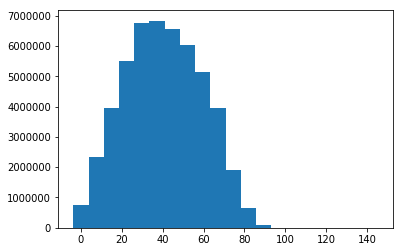

In [19]:
plt.bar(nbin,cont_dr, width=7.5)
plt.show()

Función de Correlación de Landy-Szalay

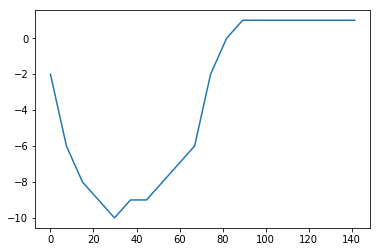

In [20]:
plt.plot(nbin,1.+ cont_data/cont_ran -2*cont_dr/cont_ran)
plt.show()

SIN PESOS

In [21]:
c1 = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos del anillo exterior,formado por enteros
c2 = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos del anillo interior,formado por enteros
c_dr = np.zeros(20,dtype=int)#arreglo de ceros del número de bins donde contaremos las distancias entre los datos y los aleatorios,formado por enteros

In [22]:
#Ciclos para calcular las distancias entre los datos del anillo exterior
for i in range(len(x1)):
    for j in range(i+1,len(x1)):
        d_d1 = distancia(x1[i],x1[j],y1[i],y1[j])
        temp1 = int(d_d1/tbin)
        c1[temp1] += 1

In [23]:
#Ciclos para calcular las distancias entre los datos del anillo interior
for i in range(len(x2)):
    for j in range(i+1,len(x2)):
        d_d2 = distancia(x2[i],x2[j],y2[i],y2[j])
        temp2 = int(d_d2/tbin)
        c2[temp2] += 1

In [24]:
for i in range(len(data_x)):
    for j in range(len(data_x)):
        d_dr = distancia(data_x[i],ran_x[j],data_y[i],ran_y[j])
        temp_dr = int(d_dr/tbin)
        c_dr[temp_dr] += 1

In [25]:
#Suma las frecuencias de las distancias
c_data = c1 + c2

Funcíon de Correlación de Peebles

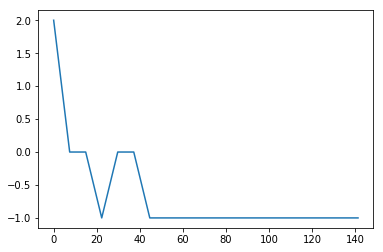

In [26]:
plt.plot(nbin,c_data/cont_ran -1)
plt.show()

Función de Correlación de Landy-Szalay

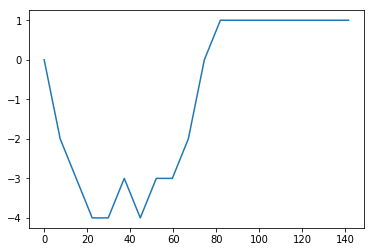

In [27]:
plt.plot(nbin,1.+ c_data/cont_ran -2*c_dr/cont_ran)
plt.show()